In [1]:
BATCH_SIZE = 32

# Introduction to Convolutional Neural Networks and Computer Vision with Tensorflow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front

## Get data

[Food 101 kaggle](https://www.kaggle.com/datasets/dansbecker/food-101) original data

[Pizza steak dataset](https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip) (modified pizza and steak dataset from food 101)


In [2]:
import zipfile

!rm -rf pizza_steak.zip
!rm -rf pizza_steak/
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-10-21 16:15:49--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 216.58.211.251, 216.58.210.155, 216.58.209.187, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|216.58.211.251|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  25.5MB/s    in 4.9s    

2024-10-21 16:15:54 (21.4 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## inspect the data

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project.... this usually means visualizing many samples of data.

In [3]:
!ls -la pizza_steak
!ls -la pizza_steak/train
# !ls -la pizza_steak/train/pizza

total 16
drwxr-xr-x 4 jupyter jupyter 4096 Oct 21 16:15 .
drwxr-xr-x 5 jupyter jupyter 4096 Oct 21 16:15 ..
drwxr-xr-x 4 jupyter jupyter 4096 Oct 21 16:15 test
drwxr-xr-x 4 jupyter jupyter 4096 Oct 21 16:15 train
total 48
drwxr-xr-x 4 jupyter jupyter  4096 Oct 21 16:15 .
drwxr-xr-x 4 jupyter jupyter  4096 Oct 21 16:15 ..
drwxr-xr-x 2 jupyter jupyter 20480 Oct 21 16:15 pizza
drwxr-xr-x 2 jupyter jupyter 20480 Oct 21 16:15 steak


In [4]:
import os

# Walk through pizza_steak dir and list number of files
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
    print(f"The are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

The are 2 directories and 0 images in 'pizza_steak'
The are 2 directories and 0 images in 'pizza_steak/train'
The are 0 directories and 750 images in 'pizza_steak/train/steak'
The are 0 directories and 750 images in 'pizza_steak/train/pizza'
The are 2 directories and 0 images in 'pizza_steak/test'
The are 0 directories and 250 images in 'pizza_steak/test/steak'
The are 0 directories and 250 images in 'pizza_steak/test/pizza'


### To visualize our images, first let's get the class names programmatically

In [5]:
# Get the classnames programmaticaly

import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
print(class_names)


['pizza' 'steak']


In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup the target directory
    target_folder = target_dir+"/"+target_class
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)
    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")
    return img
    

['2761427.jpg']
Image shape: (512, 512, 3)


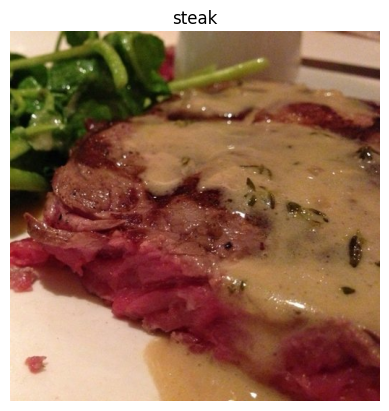

In [7]:
# Vies a random image from the trainning dataset
img = view_random_image("pizza_steak/train/", "steak")

In [8]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[242, 220, 196],
        [240, 218, 194],
        [241, 219, 195],
        ...,
        [162, 124, 111],
        [152, 115, 106],
        [143, 106,  97]],

       [[242, 220, 196],
        [241, 219, 195],
        [242, 220, 196],
        ...,
        [157, 119, 106],
        [150, 112, 101],
        [142, 106,  94]],

       [[244, 222, 198],
        [242, 220, 196],
        [242, 220, 196],
        ...,
        [156, 117, 102],
        [148, 109,  94],
        [139, 101,  88]],

       ...,

       [[251, 227, 203],
        [248, 224, 200],
        [247, 223, 197],
        ...,
        [108,  16,  27],
        [111,  20,  29],
        [114,  25,  31]],

       [[251, 229, 205],
        [250, 226, 202],
        [248, 224, 198],
        ...,
        [107,  14,  25],
        [108,  15,  25],
        [110,  19,  28]],

       [[250, 228, 204],
        [246, 224, 200],
        [247, 221, 196],
        ...,
        [106,  13,  2

In [9]:
# View the image shape
img.shape # (width, height, color channels)

(512, 512, 3)

In [10]:
# Get all the pixel values between 0 and 1
img=img/255.
img

array([[[0.94901961, 0.8627451 , 0.76862745],
        [0.94117647, 0.85490196, 0.76078431],
        [0.94509804, 0.85882353, 0.76470588],
        ...,
        [0.63529412, 0.48627451, 0.43529412],
        [0.59607843, 0.45098039, 0.41568627],
        [0.56078431, 0.41568627, 0.38039216]],

       [[0.94901961, 0.8627451 , 0.76862745],
        [0.94509804, 0.85882353, 0.76470588],
        [0.94901961, 0.8627451 , 0.76862745],
        ...,
        [0.61568627, 0.46666667, 0.41568627],
        [0.58823529, 0.43921569, 0.39607843],
        [0.55686275, 0.41568627, 0.36862745]],

       [[0.95686275, 0.87058824, 0.77647059],
        [0.94901961, 0.8627451 , 0.76862745],
        [0.94901961, 0.8627451 , 0.76862745],
        ...,
        [0.61176471, 0.45882353, 0.4       ],
        [0.58039216, 0.42745098, 0.36862745],
        [0.54509804, 0.39607843, 0.34509804]],

       ...,

       [[0.98431373, 0.89019608, 0.79607843],
        [0.97254902, 0.87843137, 0.78431373],
        [0.96862745, 0

## An end-to-end example

Let's build a cnn to find patterns in our images, more specifically we need way to

*Load our images
Preprocess our images
Build a CNN to find patterns in our images
Compile our cnn
Fit the CNN to our trainign data

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocessing data (get all of the pixel values between 0 & 1)
train_datagen = ImageDataGenerator(rescale=1./255, dtype='float32')
valid_datagen = ImageDataGenerator(rescale=1./255, dtype='float32')

# Setup paths to our data direcotries
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from direcotries and turn it into batches
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    batch_size=BATCH_SIZE,
    target_size=(224, 224),
    class_mode="binary",
    seed=42
)
valid_data = valid_datagen.flow_from_directory(
    directory=test_dir,
    batch_size=BATCH_SIZE,
    target_size=(224, 224),
    class_mode="binary",
    seed=42
)

train_data[0][0][0].shape


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


(224, 224, 3)

In [12]:
# Build a CNN model (same as the tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size=3,
        activation="relu",
        input_shape=(224,224,3)
    ),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(
        pool_size=2,
        padding="valid"
    ),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


# Cmpile our CNN
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
model_1_his = model_1.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 5s 70ms/step - loss: 0.5883 - accuracy: 0.6593 - val_loss: 0.4751 - val_accuracy: 0.7660
Epoch 2/5
47/47 [==============================] - 2s 52ms/step - loss: 0.4250 - accuracy: 0.8127 - val_loss: 0.4006 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 3s 53ms/step - loss: 0.3861 - accuracy: 0.8387 - val_loss: 0.3546 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 3s 53ms/step - loss: 0.3619 - accuracy: 0.8427 - val_loss: 0.3578 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 2s 51ms/step - loss: 0.3302 - accuracy: 0.8627 - val_loss: 0.2763 - val_accuracy: 0.9120


In [13]:
# Get model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

## Using the same model as before

Let's replicate the model we've built in previous section to see if it works with our image data.

In [14]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

# Compile the model
model_2.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
model_2_his = model_2.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 3s 52ms/step - loss: 0.7438 - accuracy: 0.5040 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 2s 51ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 2s 52ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 2s 51ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 2s 52ms/step - loss: 0.6932 - accuracy: 0.4880 - val_loss: 0.6931 - val_accuracy: 0.5000


In [15]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

# Compile the model
model_3.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
model_3_his = model_3.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 3s 56ms/step - loss: 4.3982 - accuracy: 0.6333 - val_loss: 1.2995 - val_accuracy: 0.6700
Epoch 2/5
47/47 [==============================] - 2s 51ms/step - loss: 1.5420 - accuracy: 0.6880 - val_loss: 1.5030 - val_accuracy: 0.6360
Epoch 3/5
47/47 [==============================] - 2s 51ms/step - loss: 1.2966 - accuracy: 0.6673 - val_loss: 1.7786 - val_accuracy: 0.5680
Epoch 4/5
47/47 [==============================] - 2s 52ms/step - loss: 0.7909 - accuracy: 0.7100 - val_loss: 0.5105 - val_accuracy: 0.7840
Epoch 5/5
47/47 [==============================] - 2s 51ms/step - loss: 0.5021 - accuracy: 0.7940 - val_loss: 0.4125 - val_accuracy: 0.7960


In [17]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 128)               19267712  
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 19300865 (73.63 MB)
Trainable params: 19300865 (73.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Binary classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing)
3. Created a model
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data


['1375640.jpg']
Image shape: (384, 512, 3)
['2492287.jpg']
Image shape: (512, 512, 3)


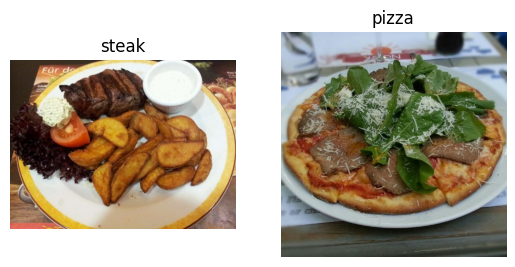

In [18]:
# Visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train", "steak")
plt.subplot(1,2,2)
steak_img = view_random_image("pizza_steak/train", "pizza")

### 2. Preprocess the data

In [19]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than look at all ~10_000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:

1. 10,000 images (or more) might not fit into the memory of your processor (or GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?

"Because 32 is good for your health."

In [20]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [21]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(224,224),
    class_mode="binary",
    batch_size=BATCH_SIZE
)
test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224,224),
    class_mode="binary",
    batch_size=BATCH_SIZE
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [22]:
# Get a sample of a train data batch
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [23]:
# how many batches are there
len(train_data)

47

In [24]:
1500/32

46.875

In [25]:
# Get the first 2 images
images[:2],  images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [26]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a model (start with baseline)

A baseline is a relativaly simple model or existing result that you setup when beginning a mmachine learning experiment and then as you keep experimenting, you try to beat the baseline.

In [27]:
# Set seed
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_4.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

### 4. Fit the model


In [28]:
# Check the lengh of training amnd test data
len(train_data), len(test_data)

(47, 16)

In [29]:
# Fit the model
model_4_his = model_4.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 4s 66ms/step - loss: 0.8446 - accuracy: 0.7087 - val_loss: 0.4100 - val_accuracy: 0.8280
Epoch 2/5
47/47 [==============================] - 3s 53ms/step - loss: 0.4388 - accuracy: 0.7933 - val_loss: 0.3915 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 3s 55ms/step - loss: 0.2905 - accuracy: 0.8907 - val_loss: 0.3550 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 3s 54ms/step - loss: 0.1488 - accuracy: 0.9560 - val_loss: 0.3708 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 2s 50ms/step - loss: 0.0616 - accuracy: 0.9900 - val_loss: 0.4734 - val_accuracy: 0.8020


### 5. Evaluate the model

In [30]:
# Let's plot training curve
import pandas as pd

<Axes: >

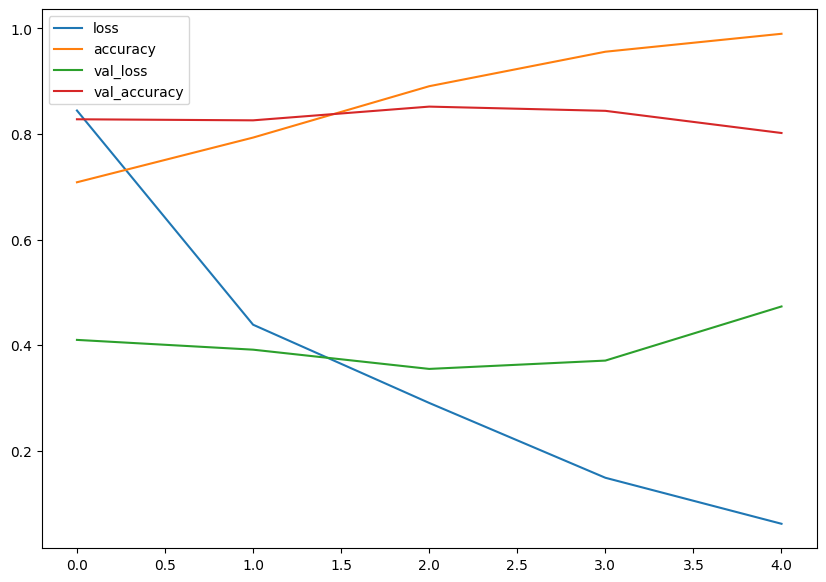

In [31]:
pd.DataFrame(model_4_his.history).plot(figsize=(10,7))

In [32]:
# Let's plot training and validation cuurves separately
def plot_loss_curves(history):
    """
    Returns separate loss curves for traiing and validation metrics
    """
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    epochs = range(len(history.history["loss"]))
    plt.figure(figsize=(10,3))
    #Plot loss
    plt.subplot(1,2,1)
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()
    # Plot accuracy    
    plt.subplot(1,2,2)
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

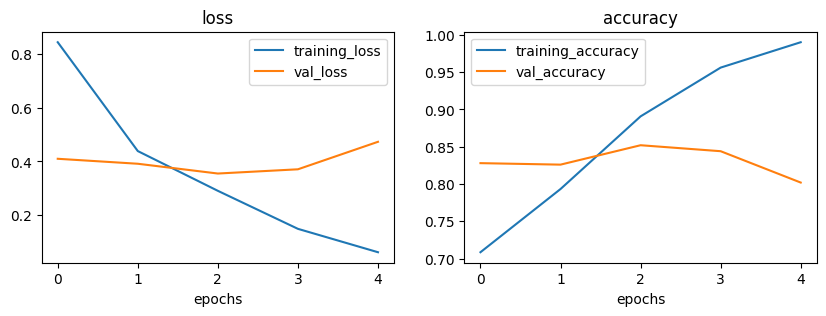

In [33]:
plot_loss_curves(model_4_his)

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer tot he output of our flattened layer

Reduce overfitting
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data

In [34]:
# Create the model (this is going to be the baseline
model_5 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(10,3,activation="relu", input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [35]:
#Compile the model
model_5.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [36]:
# Fit the model
model_5_his = model_5.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 4s 56ms/step - loss: 0.6190 - accuracy: 0.6720 - val_loss: 0.4809 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 2s 52ms/step - loss: 0.4711 - accuracy: 0.7753 - val_loss: 0.3803 - val_accuracy: 0.8600
Epoch 3/5
47/47 [==============================] - 2s 53ms/step - loss: 0.4152 - accuracy: 0.8167 - val_loss: 0.3597 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 2s 51ms/step - loss: 0.3829 - accuracy: 0.8347 - val_loss: 0.3137 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 2s 52ms/step - loss: 0.3618 - accuracy: 0.8527 - val_loss: 0.3166 - val_accuracy: 0.8720


In [37]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

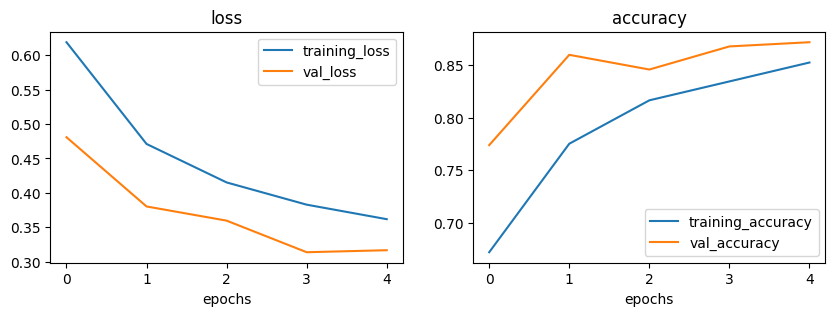

In [38]:
# Plot losss curvess
plot_loss_curves(model_5_his)

### Openning our bag of trickks and finding data augmentation

In [39]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.3,
    horizontal_flip=True
)
# Create ImageDataGen without data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)

# Create ImageDataGenerator without data augmentaion for test dataset
test_datagen = ImageDataGenerator(rescale=1./255)

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Le't write some code to visualize data augmentation...

In [40]:
# Import data and augment it from training directory
train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False
)

# Create non-augmented train data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False
)

# Create non-augmented test data batches
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False
)


Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [41]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()
test_images, test_labels = test_data.next()

Showing image number: 8


(-0.5, 223.5, 223.5, -0.5)

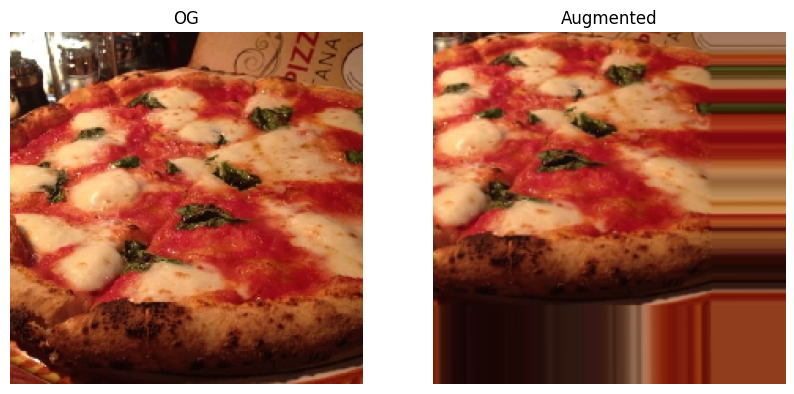

In [42]:
# Show og image and augmented image
import random
random_number = random.randint(0, 32)

print(f"Showing image number: {random_number}")
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("OG")
plt.imshow(images[random_number])
plt.axis(False)
plt.subplot(1,2,2)
plt.title("Augmented")
plt.imshow(augmented_images[random_number])
plt.axis(False)

Now we've seen what augmented trainng data looks like, let's build a model and see how it learns on augmented data.

In [43]:
# Create a model (same as model 5)
model_6 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
model_6_his  = model_6.fit(
    train_data_augmented,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 9s 179ms/step - loss: 0.7207 - accuracy: 0.5253 - val_loss: 0.6771 - val_accuracy: 0.6500
Epoch 2/5
47/47 [==============================] - 9s 181ms/step - loss: 0.7114 - accuracy: 0.4987 - val_loss: 0.6949 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 182ms/step - loss: 0.6606 - accuracy: 0.6680 - val_loss: 0.6867 - val_accuracy: 0.5200
Epoch 4/5
47/47 [==============================] - 9s 184ms/step - loss: 0.6638 - accuracy: 0.6387 - val_loss: 0.5343 - val_accuracy: 0.7720
Epoch 5/5
47/47 [==============================] - 9s 182ms/step - loss: 0.6472 - accuracy: 0.7427 - val_loss: 2.2948 - val_accuracy: 0.5020


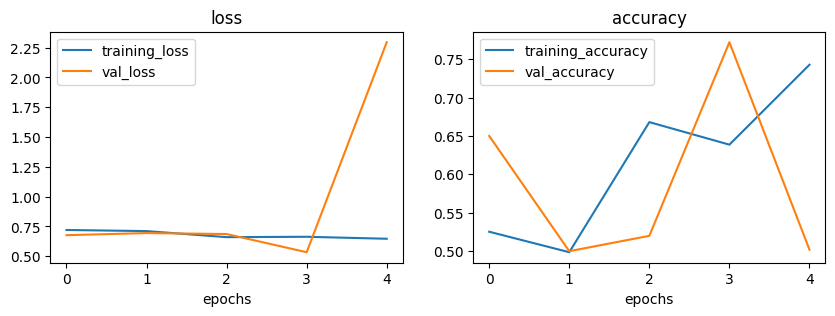

In [44]:
# Check our models training curves
plot_loss_curves(model_6_his)

Let's shuffle our augmented training data and train another model (same as before) on it and see how it performs

In [45]:
# Import data and augment it from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=True
)


Found 1500 images belonging to 2 classes.


In [46]:
model_7 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
model_7_his  = model_7.fit(
    train_data_augmented_shuffled,
    epochs=5,
    steps_per_epoch=len(train_data_augmented_shuffled),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 9s 178ms/step - loss: 0.6584 - accuracy: 0.5780 - val_loss: 0.5947 - val_accuracy: 0.6440
Epoch 2/5
47/47 [==============================] - 8s 180ms/step - loss: 0.5456 - accuracy: 0.7233 - val_loss: 0.4748 - val_accuracy: 0.7680
Epoch 3/5
47/47 [==============================] - 8s 180ms/step - loss: 0.5329 - accuracy: 0.7340 - val_loss: 0.4176 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 9s 182ms/step - loss: 0.5363 - accuracy: 0.7400 - val_loss: 0.3978 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 8s 179ms/step - loss: 0.4920 - accuracy: 0.7767 - val_loss: 0.4054 - val_accuracy: 0.8200


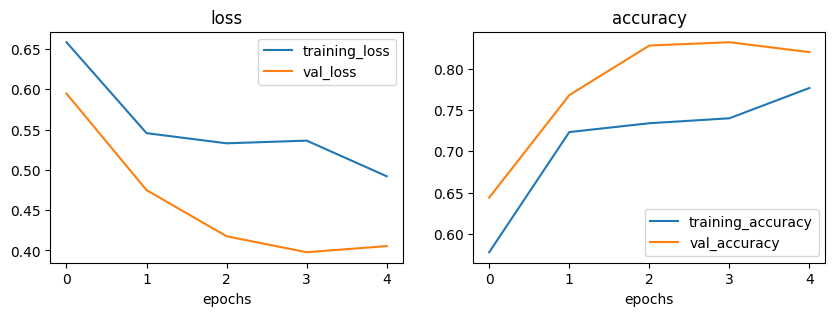

In [47]:
# Plot loss curves
plot_loss_curves(model_7_his)

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D` / `MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case

## Making prediction with our trained model on our custom image

In [48]:
# Class names
print(class_names)

['pizza' 'steak']


In [49]:
# Get custom image
!rm 03-steak.jpeg*
!rm 03-pizza-dad.jpeg*

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg


--2024-10-21 16:18:35--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.07s   

2024-10-21 16:18:37 (25.7 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]

--2024-10-21 16:18:37--  http://!wget/
Resolving !wget (!wget)... failed: Name or service not known.
wget: unable to resolve host address ‘!wget’
--2024-10-21 16:18:37--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, 

(-0.5, 3023.5, 4031.5, -0.5)

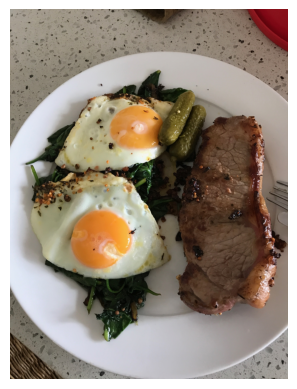

In [50]:
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [51]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

In [52]:
# Create a function to import image and resize it to be able to used with our model
def load_and_prep_image(filename, img_shape=224):
    img = tf.io.read_file(filename)
    # Decode the read file into a tensor
    img = tf.image.decode_image(img)
    # Resize the image
    img = tf.image.resize(img, size=(img_shape, img_shape))
    # Rescale the image
    img = img/255.
    return img

In [53]:
# Load in and preprocess our image
steak = load_and_prep_image("03-steak.jpeg")

In [54]:
steak.shape

TensorShape([224, 224, 3])

In [55]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

1/1 [==============================] - 0s 112ms/step


array([[0.92995936]], dtype=float32)

Let's visualize

In [56]:
# Remind ourselves of our class_names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [57]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [58]:
def pred_and_plot(model, filename, class_names=class_names):
    # Import the target image and preprocess
    img = load_and_prep_image(filename)
    # Make prediction
    pred = model.predict(tf.expand_dims(img, axis=0))
    # Get the predicted class
    pred_class = class_names[int(tf.round(pred))]
    # Plot the image and predicted calss
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)
    

1/1 [==============================] - 0s 14ms/step


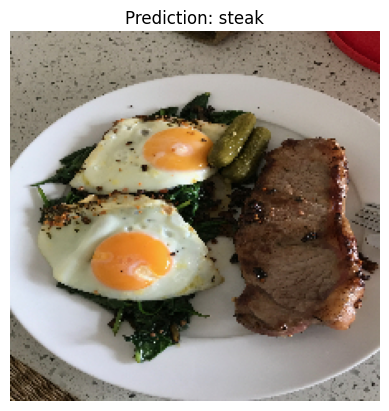

In [59]:
# Test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg")

1/1 [==============================] - 0s 14ms/step


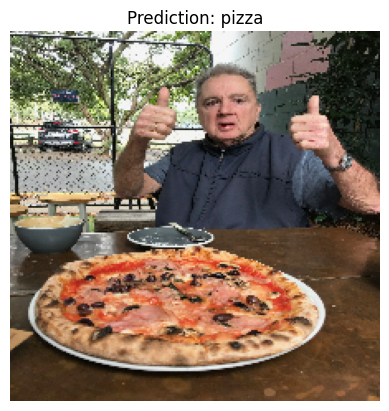

In [60]:
# Test another image
pred_and_plot(model_7, "03-pizza-dad.jpeg")

## Multi-class image classification

We've just been through a bunch of the following steps with a binary classification problem (pizza vs steak), now we're going to step things up a notch with 10 classes of food (multi-class classification).


1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

### 1. Import and become one with the data

In [61]:
!rm -rf 10_food_classes_all_data.zip*
!rm -rf 10_food_classes_all_data/*
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2024-10-21 16:22:54--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 216.58.211.251, 216.58.209.187, 216.58.210.155, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|216.58.211.251|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  29.7MB/s    in 18s     

2024-10-21 16:23:11 (28.2 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [65]:
import zipfile

zipref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zipref.extractall()
zipref.close()

In [67]:
!rm -rf __MACOSX

In [68]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in '10_food_classes_all_data'
There are 10 directories and 0 images in '10_food_classes_all_data/train'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'
There are 1

In [69]:
# Setup the train and test directories
traindir = "10_food_classes_all_data/train/"
testdir = "10_food_classes_all_data/test/"

In [70]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(traindir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

['2484044.jpg']
Image shape: (512, 384, 3)


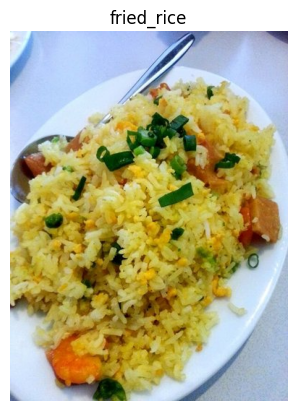

In [72]:
# Visualize, visualize, visualize
import random
img = view_random_image(
    traindir,
    random.choice(class_names)
)

### 2. Preprocess the data (prepare it for a model)

In [74]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(
    traindir,
    target_size=(224,224),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)
test_data = test_datagen.flow_from_directory(
    testdir,
    target_size=(224,224),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)


In [77]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten

# Create our model
model_8 = Sequential([
    Conv2D(10, 3, input_shape=(224,224,3), activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

In [78]:
# Compile the model
model_8.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [79]:
# Fit the model
model_8_his = model_8.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
235/235 [==============================] - 13s 53ms/step - loss: 2.2487 - accuracy: 0.1617 - val_loss: 2.1481 - val_accuracy: 0.2068
Epoch 2/5
235/235 [==============================] - 13s 54ms/step - loss: 1.9237 - accuracy: 0.3305 - val_loss: 2.0981 - val_accuracy: 0.2512
Epoch 3/5
235/235 [==============================] - 12s 51ms/step - loss: 1.2469 - accuracy: 0.5848 - val_loss: 2.7458 - val_accuracy: 0.2320
Epoch 4/5
235/235 [==============================] - 12s 53ms/step - loss: 0.5357 - accuracy: 0.8313 - val_loss: 4.0434 - val_accuracy: 0.2128
Epoch 5/5
235/235 [==============================] - 12s 53ms/step - loss: 0.2091 - accuracy: 0.9416 - val_loss: 5.4249 - val_accuracy: 0.2124


### 5. Evaluate the model

In [80]:
# Evaluate on the test data
model_8.evaluate(test_data)

79/79 [==============================] - 3s 38ms/step - loss: 5.4249 - accuracy: 0.2124


[5.42490291595459, 0.21240000426769257]

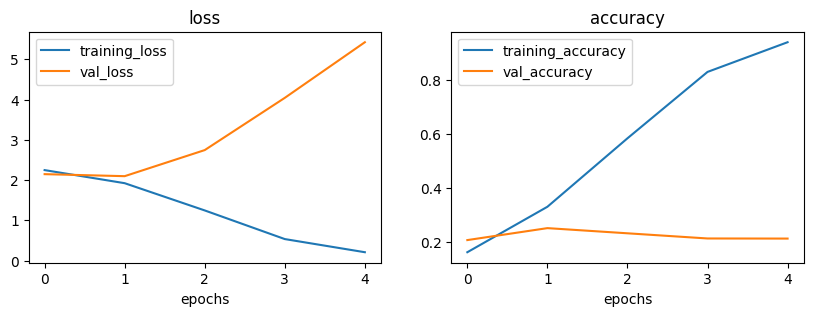

In [81]:
# Check out model's loss curves
plot_loss_curves(model_8_his)

What does these curves tell us?

We are **overfitting** (test data gets worse while train data gets better)

### 6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting)

Let's try and fix overfitting

* **Get more data** - having more data gives a model more opportunity to learn diverse patterns...
* **sumplify the model** - if current model is  overfitting the data, it may be too complicated of a model one way to simplify a model is to: reduce # of layers or reduce # hidden units in layers
* **Data augmentation** - Increase data diversity without adding data
* **Use transfer learning** - transfer learning leverages the patterns anothe model has learned on similar data to your own and allows you to use those patterns on your own dataset

In [82]:
# How about we try to simplify the model first
# Lets try to remove 2 convolutional layers

# Create our model
model_9 = Sequential([
    Conv2D(10, 3, input_shape=(224,224,3), activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

# Compile the model
model_9.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
model_9_his = model_9.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
235/235 [==============================] - 13s 52ms/step - loss: 2.1207 - accuracy: 0.2355 - val_loss: 1.9344 - val_accuracy: 0.3296
Epoch 2/5
235/235 [==============================] - 12s 50ms/step - loss: 1.7713 - accuracy: 0.3948 - val_loss: 1.8891 - val_accuracy: 0.3396
Epoch 3/5
235/235 [==============================] - 12s 51ms/step - loss: 1.3908 - accuracy: 0.5453 - val_loss: 1.8620 - val_accuracy: 0.3732
Epoch 4/5
235/235 [==============================] - 12s 51ms/step - loss: 0.8487 - accuracy: 0.7408 - val_loss: 2.2145 - val_accuracy: 0.3312
Epoch 5/5
235/235 [==============================] - 12s 52ms/step - loss: 0.4241 - accuracy: 0.8852 - val_loss: 2.6098 - val_accuracy: 0.3164


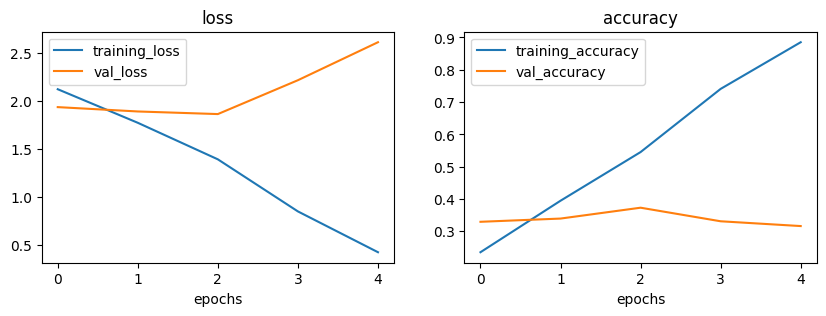

In [83]:
# Check out the loss curves of model 9
plot_loss_curves(model_9_his)

#### Trying to reduce overfitting with data augmentation

Let's try and improve our model's results by usinf augmented data

Ideally we want to:
* Reduce overfitting (get the train and validation curves closer)
* Improve validation accuracy

In [85]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.3,
    horizontal_flip=True
)
# Create ImageDataGen without data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)

# Create ImageDataGenerator without data augmentaion for test dataset
test_datagen = ImageDataGenerator(rescale=1./255)

In [87]:

# load data in from directories and turn it into batches
train_data_augmented = train_datagen_augmented.flow_from_directory(
    traindir,
    target_size=(224,224),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)
test_data = test_datagen.flow_from_directory(
    testdir,
    target_size=(224,224),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [88]:

# Create our model
model_10 = tf.keras.models.clone_model(model_8)

# Compile the model
model_10.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
model_10_his = model_10.fit(
    train_data_augmented,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)


Epoch 1/5
235/235 [==============================] - 44s 182ms/step - loss: 2.2469 - accuracy: 0.1604 - val_loss: 2.1232 - val_accuracy: 0.2180
Epoch 2/5
235/235 [==============================] - 42s 179ms/step - loss: 2.1777 - accuracy: 0.1983 - val_loss: 2.0745 - val_accuracy: 0.2740
Epoch 3/5
235/235 [==============================] - 42s 180ms/step - loss: 2.1000 - accuracy: 0.2484 - val_loss: 1.9400 - val_accuracy: 0.3036
Epoch 4/5
235/235 [==============================] - 42s 179ms/step - loss: 2.0173 - accuracy: 0.2833 - val_loss: 1.8569 - val_accuracy: 0.3600
Epoch 5/5
235/235 [==============================] - 43s 182ms/step - loss: 1.9502 - accuracy: 0.3217 - val_loss: 1.7667 - val_accuracy: 0.3916


In [89]:
model_8.evaluate(test_data)

79/79 [==============================] - 3s 36ms/step - loss: 5.4249 - accuracy: 0.2124


[5.42490291595459, 0.21240000426769257]

In [90]:
model_10.evaluate(test_data)

79/79 [==============================] - 3s 39ms/step - loss: 1.7667 - accuracy: 0.3916


[1.766727328300476, 0.39160001277923584]

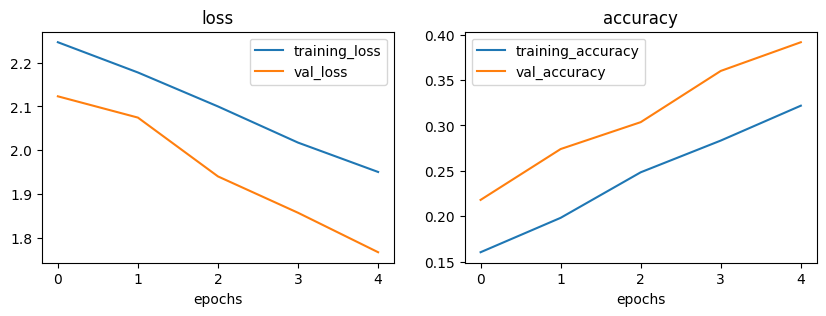

In [91]:
# Check out model 10 loss curves
plot_loss_curves(model_10_his)

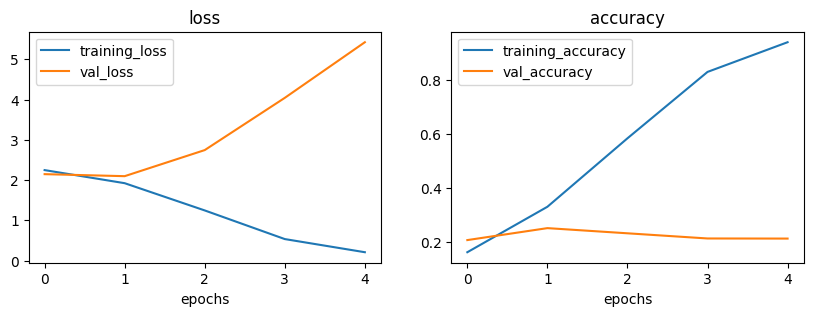

In [92]:
plot_loss_curves(model_8_his)

# 🎉

### 7. Repeat until satisfied

We could keep going here... continally trying to bring our loss curves closer together and trying to improve the validation/test accuracy.

How?

By running lots of experiements, namely:
* restructing our model's architecture (increasing layers/hidden units)
* Adjust the learning rate
* Try different methods of data augmentation (adjust the hyperparameters in our imageDataGenerator instance)
* Training for longer (e.g. 10 epochs instead of 5 epochs)
* Try **transfer learning**

### Making prediction with our trained model

Let's use our trained model to make some predictions on our own custom images!

In [93]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [96]:
!rm -rf *.jpeg*

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg


--2024-10-21 17:28:52--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1725178 (1.6M) [image/jpeg]
Saving to: ‘03-sushi.jpeg’

03-sushi.jpeg       100%[===================>]   1.64M  --.-KB/s    in 0.1s    

2024-10-21 17:28:52 (13.8 MB/s) - ‘03-sushi.jpeg’ saved [1725178/1725178]

--2024-10-21 17:28:52--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200

In [102]:
def pred_and_plot(model, filename, class_names=class_names):
    # Import the target image and preprocess
    img = load_and_prep_image(filename)
    # Make prediction
    pred = model.predict(tf.expand_dims(img, axis=0))
    # Add in logic for multi-class
    if len(pred[0]) > 1:
        pred_class = class_names[tf.argmax(pred[0])]
    else:
        pred_class = class_names[int(tf.round(pred[0]))]
    # Plot the image and predicted calss
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)
    

1/1 [==============================] - 0s 14ms/step


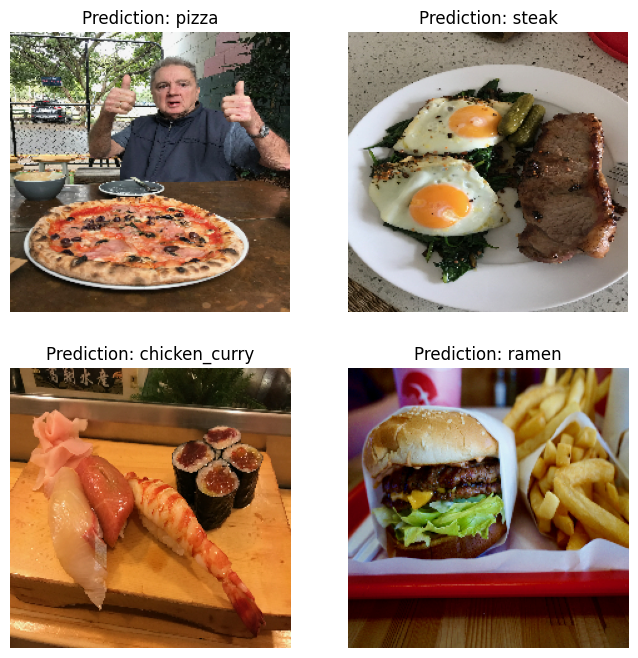

In [106]:
# Make a prediction using model 10
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
pred_and_plot(model=model_10,filename="03-pizza-dad.jpeg",class_names=class_names)
plt.subplot(2,2,2)
pred_and_plot(model=model_10,filename="03-steak.jpeg",class_names=class_names)
plt.subplot(2,2,3)
pred_and_plot(model=model_10,filename="03-sushi.jpeg",class_names=class_names)
plt.subplot(2,2,4)
pred_and_plot(model=model_10,filename="03-hamburger.jpeg",class_names=class_names)

## Saving and loading our model

In [107]:
# Save a model
model_10.save("saved_trained_model_10")

INFO:tensorflow:Assets written to: saved_trained_model_10/assets


INFO:tensorflow:Assets written to: saved_trained_model_10/assets


In [108]:
# Load in a trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 3s 41ms/step - loss: 1.7667 - accuracy: 0.3916


[1.7667279243469238, 0.39160001277923584]

In [111]:
!rm -rf *.jpeg*
!rm -rf *.zip*
!rm -rf 10_food_classes_all_data/
!rm -rf pizza_steak/
!rm -rf saved_trained_model_10/